In [13]:
import statsmodels.tsa.api as tsa
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
aapl = yf.download('AAPL', '2020-1-1','2020-10-25')

[*********************100%***********************]  1 of 1 completed


In [31]:
data = aapl.Close.squeeze().dropna()
data

Date
2019-12-31     73.412498
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
                 ...    
2020-10-19    115.980003
2020-10-20    117.510002
2020-10-21    116.870003
2020-10-22    115.750000
2020-10-23    115.040001
Name: Close, Length: 207, dtype: float64

In [32]:
components = tsa.seasonal_decompose(data, model='additive',period=7)

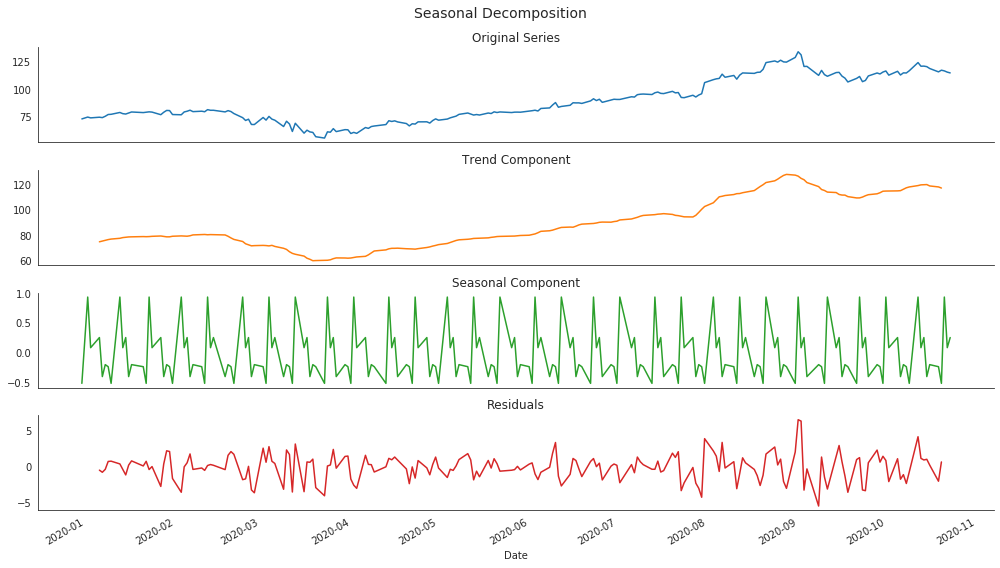

In [33]:
ts = (data.to_frame('Original')
      .assign(Trend=components.trend)
      .assign(Seasonality=components.seasonal)
      .assign(Residual=components.resid))
with sns.axes_style('white'):
    ts.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

In [38]:
components = tsa.seasonal_decompose(data, model='multiplicative',period=14)

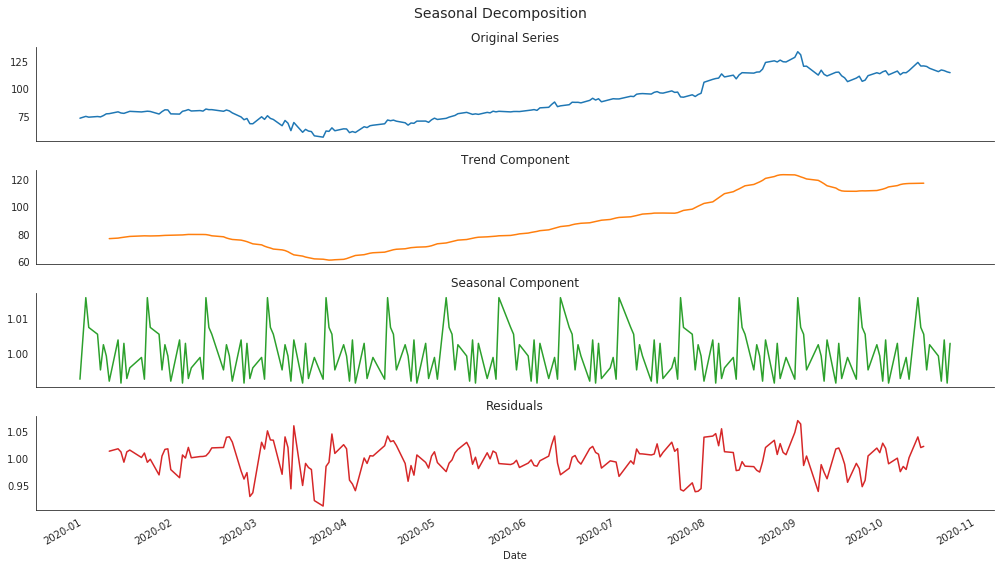

In [39]:
ts = (data.to_frame('Original')
      .assign(Trend=components.trend)
      .assign(Seasonality=components.seasonal)
      .assign(Residual=components.resid))
with sns.axes_style('white'):
    ts.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);